In [1]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [2]:
# Define the connection string
server = 'pw2-g2-y2-sqlserver.database.windows.net'
database = 'BC_Data'
username = 'group2_admin_pw2'
password = 'AlfaBravo2'
driver = '{ODBC Driver 17 for SQL Server}'  

# Create the connection string
connection_string = f'DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}'

# Define the SQL queries
query = 'SELECT * FROM dwh.region_sdi'
query1 = 'SELECT * FROM dwh.percent1'
query2 = 'SELECT * FROM dwh.region'
query3= 'select * from dwh.nation'

try:
    # Connect to the database
    with pyodbc.connect(connection_string) as conn:

        # Execute the first query and fetch the results into a DataFrame
        region_sdi_df = pd.read_sql(query, conn)

        # filter the DataFrame
        region_sdi_df = region_sdi_df[(region_sdi_df['age'] == 'All ages') & (region_sdi_df['location'] != 'Global') & (region_sdi_df['measure'] == 'Deaths') & (region_sdi_df['metric'] != 'Number')]

        # delete unwanted columns
        region_sdi_df.drop(columns=[
            'measure',
            'sex',
            'age',
            'cause',
            'upper',
            'lower'
        ], inplace=True)#inplace = true  modify the DataFrame in place, do not create a new object

        # Reset the DataFrame index
        region_sdi_df.reset_index(drop=True, inplace=True)#drop delete the old index

        
        #print(region_sdi_df)

        # Execute the second query and fetch the results into another DataFrame
        region_df = pd.read_sql(query2, conn)

        
        region_df = region_df[(region_df['age'] == 'All ages') & (region_df['location'] != 'Global') & (region_df['measure'] == 'Deaths') & (region_df['metric'] != 'Number')]

        
        region_df.drop(columns=[
            'measure',
            'sex',
            'age',
            'cause',
            'upper',
            'lower'
        ], inplace=True)

        
        region_df.reset_index(drop=True, inplace=True)

        
        #print(region_df)


        nation_df = pd.read_sql(query3, conn)
        nation_df = nation_df[(nation_df['age'] == 'All ages') & (nation_df['measure'] == 'Deaths')]

        nation_df.drop(columns=[
            'measure',
            'sex',
            'age',
            'cause',
            'upper',
            'lower'
            ], inplace=True)

        nation_df.reset_index(drop=True, inplace=True)

        print(nation_df)

        percent_df = pd.read_sql(query1, conn)

        percent_df = percent_df[(percent_df['age'] == 'All ages') & (percent_df['Location'] != 'Global') & (percent_df['measure'] == 'Deaths') & (percent_df['metric'] != 'Number')]

        percent_df.drop(columns=[
            'measure',
            'sex',
            'age',
            'upper',
            'lower'
        ], inplace=True)

        #replace the name of the location for do the join
        percent_df['Location'].replace({k:v for (k,v) in zip(percent_df['Location'].unique(), region_sdi_df['location'].unique())}, inplace=True)# k:v for (k,v) in zip() is a dictionary comprehension
        
        percent_df.reset_index(drop=True, inplace=True)
        print(percent_df)


except Exception as e:
    print(f'Errore durante l\'esecuzione delle query: {str(e)}')

C:\Users\DanielBollati\AppData\Local\Temp\ipykernel_28936\3422822964.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  region_sdi_df = pd.read_sql(query, conn)
C:\Users\DanielBollati\AppData\Local\Temp\ipykernel_28936\3422822964.py:44: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  region_df = pd.read_sql(query2, conn)
C:\Users\DanielBollati\AppData\Local\Temp\ipykernel_28936\3422822964.py:66: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  nation_df = pd.read_sql(query3, conn)


                  location   metric  year         val
0              Timor-Leste   Number  1990   22.770953
1              Timor-Leste  Percent  1990    0.002914
2              Timor-Leste     Rate  1990    2.908307
3                    Haiti   Number  1990  499.478026
4                    Haiti  Percent  1990    0.005943
...                    ...      ...   ...         ...
18355  Republic of Moldova  Percent  2019    0.012490
18356  Republic of Moldova     Rate  2019   13.892958
18357                 Chad   Number  2019  406.377536
18358                 Chad  Percent  2019    0.002594
18359                 Chad     Rate  2019    2.478084

[18360 rows x 4 columns]
      year            cause   metric  Location       val
0     1990          Tobacco  Percent  High SDI  0.052040
1     1990          Tobacco     Rate  High SDI  0.220222
2     1990      Alcohol use  Percent  High SDI  0.023259
3     1990      Alcohol use     Rate  High SDI  0.098384
4     1990  Metabolic risks  Percent  Hig

C:\Users\DanielBollati\AppData\Local\Temp\ipykernel_28936\3422822964.py:82: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  percent_df = pd.read_sql(query1, conn)


In [3]:
# this code is used to map the continents to the countries
continets_map = {
    "Lao People's Democratic Republic": "Asia",
    "Saint Kitts and Nevis": "North America",
    "Puerto Rico": "North America",
    "Antigua and Barbuda": "North America",
    "Finland": "Europe",
    "Sao Tome and Principe": "Africa",
    "Republic of Korea": "Asia",
    "Rwanda": "Africa",
    "Bahrain": "Asia",
    "Eswatini": "Africa",
    "Northern Mariana Islands": "Oceania",
    "Gambia": "Africa",
    "Liberia": "Africa",
    "Guatemala": "North America",
    "Andorra": "Europe",
    "New Zealand": "Oceania",
    "Cabo Verde": "Africa",
    "Angola": "Africa",
    "Nauru": "Oceania",
    "Uganda": "Africa",
    "Monaco": "Europe",
    "Egypt": "Africa",
    "Kyrgyzstan": "Asia",
    "Mali": "Africa",
    "Azerbaijan": "Asia",
    "Italy": "Europe",
    "Brazil": "South America",
    "Bermuda": "North America",
    "Guinea-Bissau": "Africa",
    "Palau": "Oceania",
    "Netherlands": "Europe",
    "Namibia": "Africa",
    "United States of America": "North America",
    "Greenland": "North America",
    "Cameroon": "Africa",
    "Jordan": "Asia",
    "Madagascar": "Africa",
    "Belarus": "Europe",
    "Marshall Islands": "Oceania",
    "Bolivia": "South America",
    "Malaysia": "Asia",
    "San Marino": "Europe",
    "Sri Lanka": "Asia",
    "Indonesia": "Asia",
    "Jamaica": "North America",
    "Democratic People's Republic of Korea": "Asia",
    "Côte d'Ivoire": "Africa",
    "Uzbekistan": "Asia",
    "Germany": "Europe",
    "Philippines": "Asia",
    "Cuba": "North America",
    "Lithuania": "Europe",
    "Iceland": "Europe",
    "Senegal": "Africa",
    "United States Virgin Islands": "North America",
    "Barbados": "North America",
    "Kuwait": "Asia",
    "Cyprus": "Europe",
    "Hungary": "Europe",
    "Malawi": "Africa",
    "Switzerland": "Europe",
    "Estonia": "Europe",
    "Palestine": "Asia",
    "Algeria": "Africa",
    "Comoros": "Africa",
    "Ecuador": "South America",
    "Nigeria": "Africa",
    "Samoa": "Oceania",
    "El Salvador": "North America",
    "North Macedonia": "Europe",
    "Malta": "Europe",
    "Mongolia": "Asia",
    "Bahamas": "North America",
    "Bosnia and Herzegovina": "Europe",
    "Lebanon": "Asia",
    "Montenegro": "Europe",
    "Ethiopia": "Africa",
    "Saudi Arabia": "Asia",
    "Iraq": "Asia",
    "American Samoa": "Oceania",
    "Chad": "Africa",
    "Australia": "Oceania",
    "Mauritius": "Africa",
    "Belize": "North America",
    "United Kingdom": "Europe",
    "Mexico": "North America",
    "Albania": "Europe",
    "Myanmar": "Asia",
    "Sierra Leone": "Africa",
    "Sweden": "Europe",
    "Viet Nam": "Asia",
    "Honduras": "North America",
    "Kenya": "Africa",
    "Nicaragua": "North America",
    "Ukraine": "Europe",
    "Trinidad and Tobago": "North America",
    "Syrian Arab Republic": "Asia",
    "China": "Asia",
    "Argentina": "South America",
    "Brunei Darussalam": "Asia",
    "Fiji": "Oceania",
    "Solomon Islands": "Oceania",
    "Armenia": "Asia",
    "Kiribati": "Oceania",
    "Serbia": "Europe",
    "Peru": "South America",
    "United Republic of Tanzania": "Africa",
    "Democratic Republic of the Congo": "Africa",
    "Czechia": "Europe",
    "Libya": "Africa",
    "Burkina Faso": "Africa",
    "India": "Asia",
    "Maldives": "Asia",
    "Croatia": "Europe",
    "Tuvalu": "Oceania",
    "Austria": "Europe",
    "Botswana": "Africa",
    "Dominica": "North America",
    "Greece": "Europe",
    "Timor-Leste": "Asia",
    "United Arab Emirates": "Asia",
    "Equatorial Guinea": "Africa",
    "Israel": "Asia",
    "Qatar": "Asia",
    "Uruguay": "South America",
    "Zimbabwe": "Africa",
    "Tonga": "Oceania",
    "Tokelau": "Oceania",
    "Poland": "Europe",
    "Suriname": "South America",
    "Canada": "North America",
    "Bulgaria": "Europe",
    "Afghanistan": "Asia",
    "Central African Republic": "Africa",
    "Togo": "Africa",
    "Burundi": "Africa",
    "Republic of Moldova": "Europe",
    "Saint Vincent and the Grenadines": "North America",
    "Sudan": "Africa",
    "Slovenia": "Europe",
    "Guyana": "South America",
    "South Sudan": "Africa",
    "Haiti": "North America",
    "Tunisia": "Africa",
    "Ireland": "Europe",
    "Latvia": "Europe",
    "Niue": "Oceania",
    "Slovakia": "Europe",
    "Mozambique": "Africa",
    "Gabon": "Africa",
    "Somalia": "Africa",
    "Guinea": "Africa",
    "Thailand": "Asia",
    "Norway": "Europe",
    "France": "Europe",
    "Grenada": "North America",
    "Benin": "Africa",
    "Dominican Republic": "North America",
    "Luxembourg": "Europe",
    "Belgium": "Europe",
    "Japan": "Asia",
    "Bhutan": "Asia",
    "Turkmenistan": "Asia",
    "Morocco": "Africa",
    "Tajikistan": "Asia",
    "Georgia": "Asia",
    "Yemen": "Asia",
    "Spain": "Europe",
    "Oman": "Asia",
    "Saint Lucia": "North America",
    "Papua New Guinea": "Oceania",
    "Turkey": "Asia",
    "Cook Islands": "Oceania",
    "Eritrea": "Africa",
    "Venezuela": "South America",
    "Bangladesh": "Asia",
    "Congo": "Africa",
    "Ghana": "Africa",
    "Romania": "Europe",
    "Pakistan": "Asia",
    "Denmark": "Europe",
    "Singapore": "Asia",
    "Lesotho": "Africa",
    "Colombia": "South America",
    "Panama": "North America",
    "Cambodia": "Asia",
    "Seychelles": "Africa",
    "Mauritania": "Africa",
    "Niger": "Africa",
    "Iran": "Asia",
    "Chile": "South America",
    "Nepal": "Asia",
    "Russian Federation": "Europe",
    "South Africa": "Africa",
    "Djibouti": "Africa",
    "Zambia": "Africa",
    "Portugal": "Europe",
    "Taiwan": "Asia",
    "Guam": "Oceania",
    "Kazakhstan": "Asia",
    "Micronesia": "Oceania",
    "Costa Rica": "North America",
    "Paraguay": "South America",
    "Vanuatu": "Oceania"
}

# Add a 'continent' column to the main DataFrame
nation_df['continent'] = nation_df['location'].map(continets_map) #map() assign the country to the continent
nation_df['continent'] = nation_df['location'].str.strip().map(continets_map)

# Descriptive Statistical Analysis

In [4]:
stats_df = pd.DataFrame({df_name: df['val'].describe() for df_name, df in zip(['nation', 'region', 'region_sdi', 'percent'], [nation_df, region_df, region_sdi_df, percent_df])})

stats_df

,nation,region,region_sdi,percent
count,18360.000000,630.000000,150.000000,1500.000000
mean,852.427615,9.676898,8.392783,0.263716
std,4540.150381,5.582889,4.605965,0.452682
min,0.000575,3.455839,3.694908,0.007054
25%,0.018210,4.830952,4.567857,0.033176
50%,6.541604,7.937454,6.352434,0.075622
75%,81.512116,15.054146,10.832264,0.230662
max,96306.310780,23.588512,16.859194,2.494516


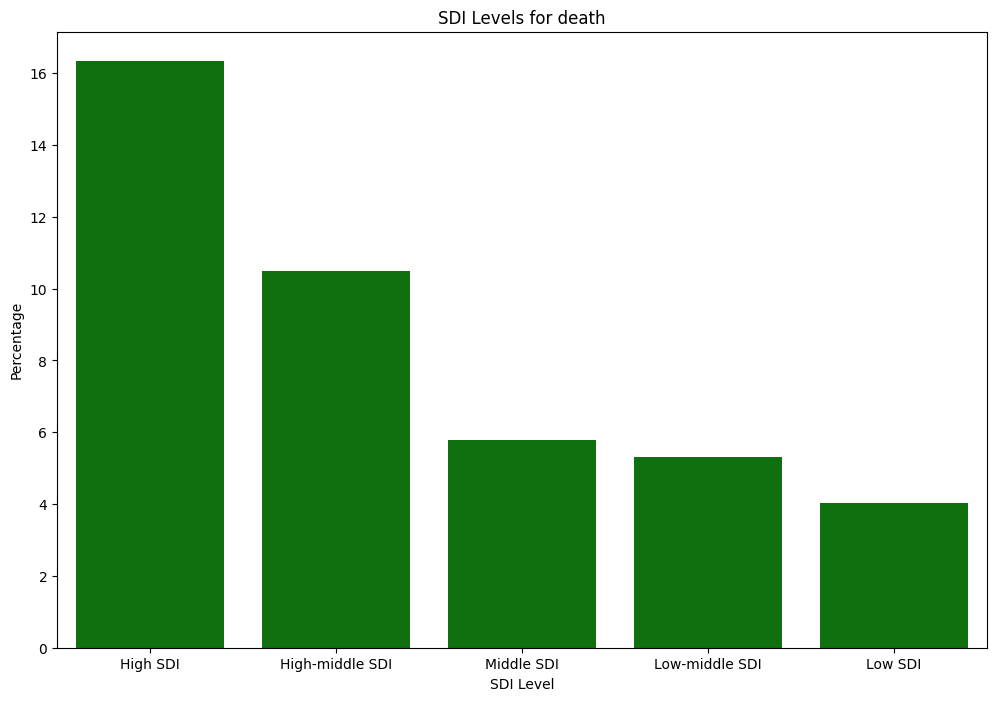

In [5]:
plt.figure(figsize = (12, 8))
# Plot the distribution of the 'val' column for each DataFrame
sns.barplot(x='location', y='val', data=region_sdi_df[region_sdi_df['metric'] == 'Rate'], errorbar=None, color = 'green', order=['High SDI', 'High-middle SDI', 'Middle SDI', 'Low-middle SDI', 'Low SDI'])

plt.title('SDI Levels for death')
plt.xlabel('SDI Level')
plt.ylabel('Percentage')

plt.show()

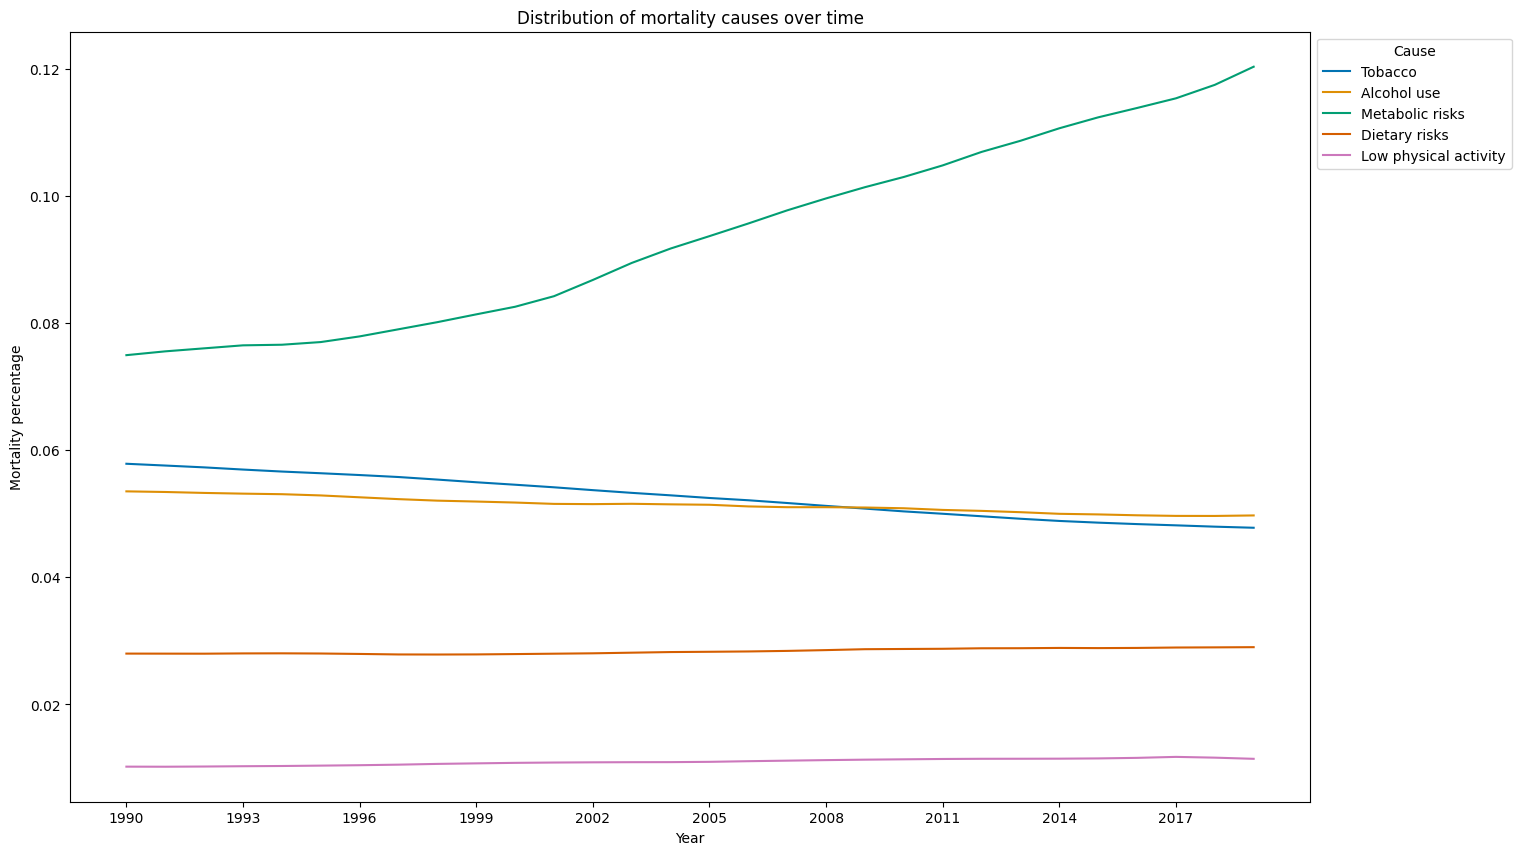

In [6]:

# Convert 'year' column to numeric type
percent_df['year'] = pd.to_numeric(percent_df['year'])

plt.figure(figsize=(16, 10))

sns.lineplot(x='year', y='val', hue='cause', data=percent_df[percent_df['metric'] == 'Percent'], errorbar=None, palette='colorblind')
plt.xticks(range(1990, 2018, 3))

plt.title('Distribution of mortality causes over time')
plt.xlabel('Year')
plt.ylabel('Mortality percentage')

plt.legend(title='Cause', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()


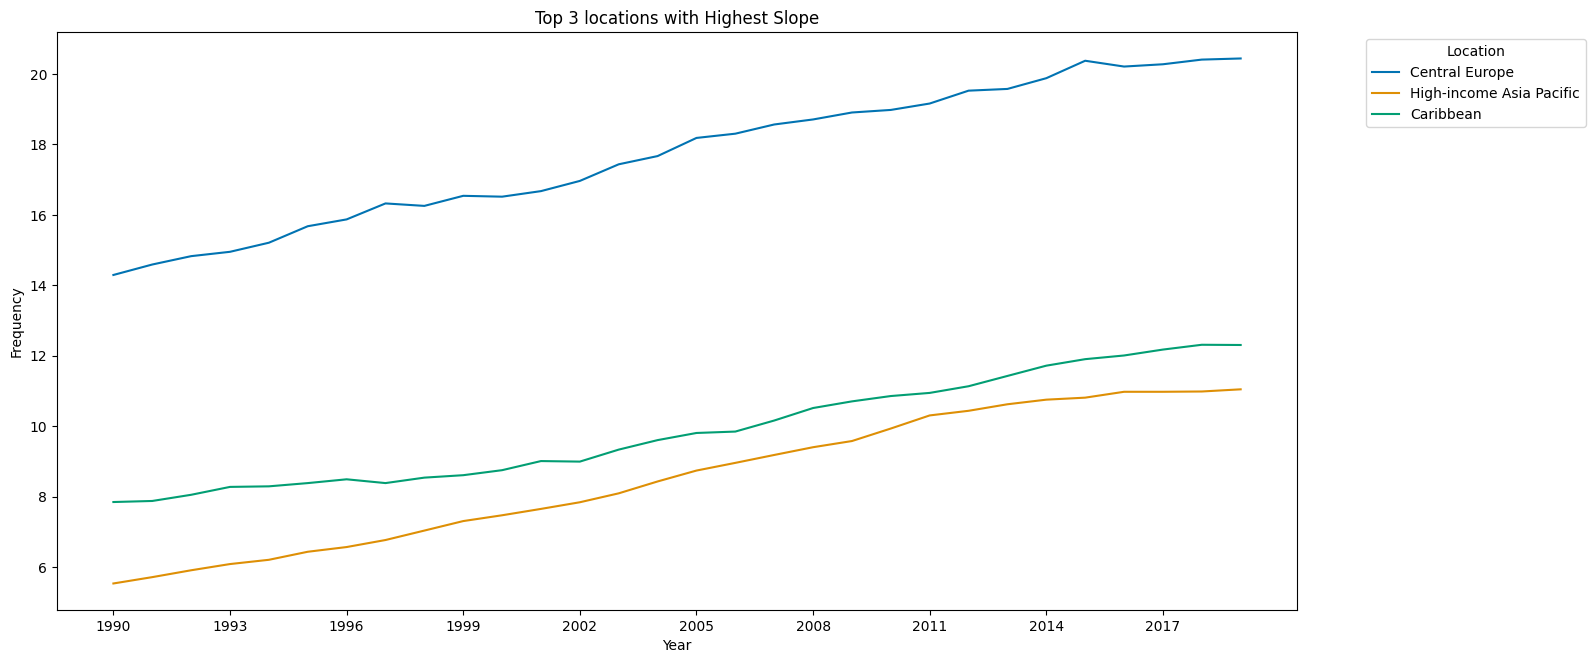

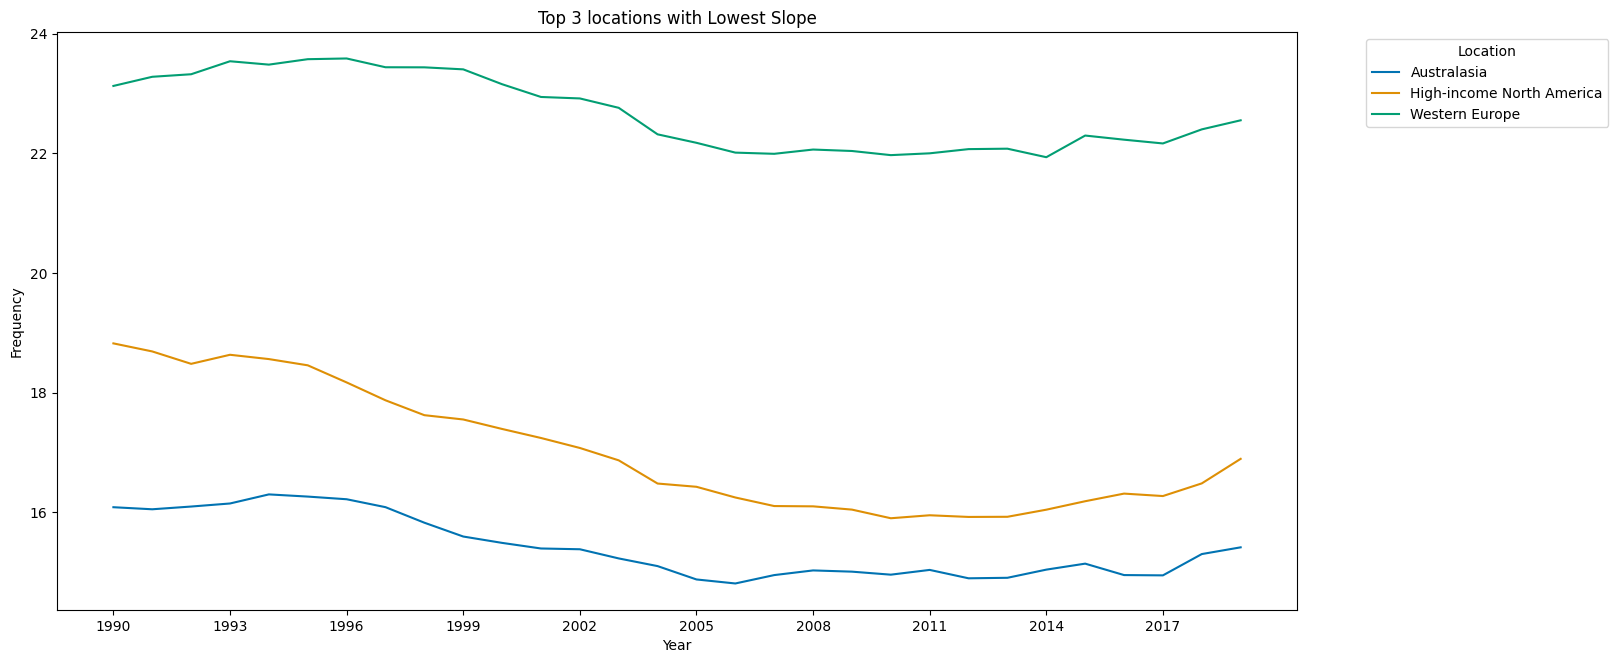

In [7]:
# Convert 'year' column to numeric type
region_df['year'] = pd.to_numeric(region_df['year'], errors='coerce')

# Create a list to store the slope data
slope_data = []
# Select only the rows with 'Rate' as metric
region_df_rate = region_df[region_df['metric'] == 'Rate']
# Group the DataFrame by location
for location, data in region_df_rate.groupby('location'):
    result = linregress(data['year'], data['val'])
    slope_data.append({'location': location, 'slope': result.slope})#append add a new element to the list,slpoe_data is a list of dictionary

# Crete a DataFrame from the slope data
slope_df = pd.DataFrame(slope_data)

# Select the top 3 locations with the highest slope
top_locations_high_slope = slope_df.nlargest(3, 'slope')['location']

# Select the top 3 locations with the lowest slope
top_locations_low_slope = slope_df.nsmallest(3, 'slope')['location']

# Filter the dataframe to include only the top locations with the highest slope
df_filtered_high_slope = region_df_rate[region_df_rate['location'].isin(top_locations_high_slope)]

# Create the first graph with the top 3 locations with the highest slope
plt.figure(figsize=(16, 7.5))
# Create the lineplot
sns.lineplot(x='year', y='val', hue='location', data=df_filtered_high_slope, palette='colorblind')
plt.xticks(range(1990, 2018, 3))#range(start, stop, step)

plt.title('Top 3 locations with Highest Slope')
plt.xlabel('Year')
plt.ylabel('Frequency')  

plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# Filter the dataframe to include only the top locations with the lowest slope
df_filtered_low_slope = region_df_rate[region_df_rate['location'].isin(top_locations_low_slope)]

# Crete the second graph with the top 3 locations with the lowest slope
plt.figure(figsize=(16, 7.5))

sns.lineplot(x='year', y='val', hue='location', data=df_filtered_low_slope, palette='colorblind')
plt.xticks(range(1990, 2018, 3))

plt.title('Top 3 locations with Lowest Slope')
plt.xlabel('Year')
plt.ylabel('Frequency')  

plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


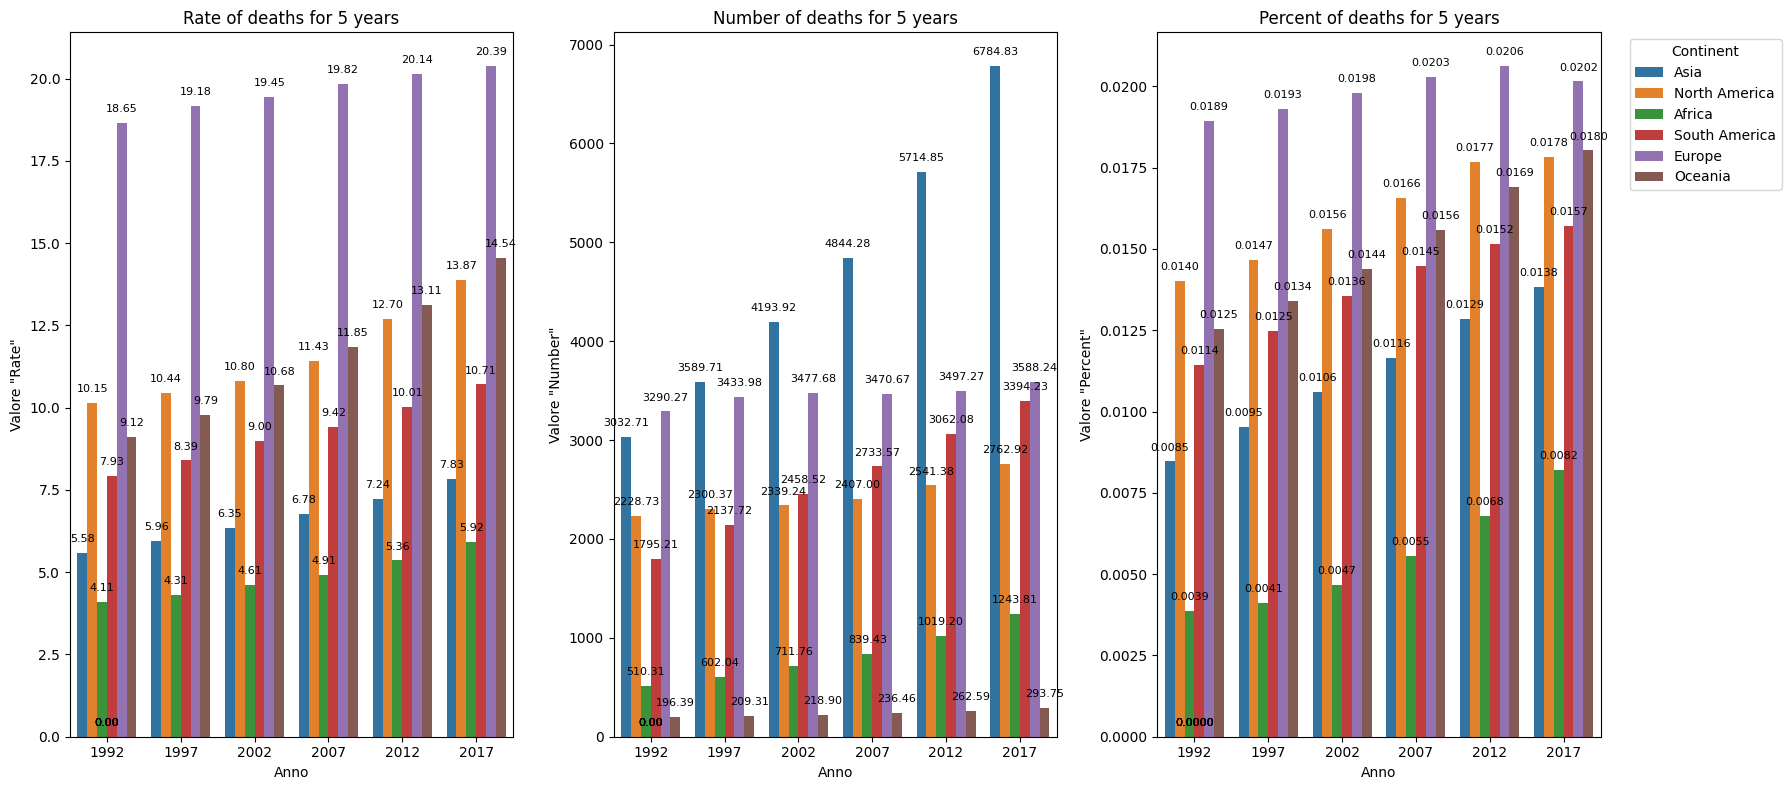

In [10]:
# Convert 'year' column to numeric type
nation_df['year'] = pd.to_numeric(nation_df['year'], errors='coerce')
filtered_df = nation_df[(nation_df['metric'] == 'Rate')].copy()#copy the dataframe and store it in filtered_df
filtered_df1 = nation_df[(nation_df['metric'] == 'Number')].copy()#copy the dataframe and store it in filtered_df1
filtered_df2 = nation_df[(nation_df['metric'] == 'Percent')].copy()#copy the dataframe and store it in filtered_df2


#setting the number of rows and columns
n_rows = 1#number of rows
n_cols = 3#number of columns

#create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 8))#fig,axes :returns a tuple containing a figure and axes object(s). Thus, fig, ax=plt.subplots() unpacks into fig and ax


# Function to create a barplot
def create_barplot(ax, data, title, x_label, y_label, show_legend=False, decimal_places=2):
#ax: axes object on which the plot will be drawn, data: dataframe containing the data to be plotted, title: title of the plot, x_label: label of the x axis, y_label: label of the y axis, show_legend: boolean value to show or hide the legend, decimal_places: number of decimal places to show in the bar labels
    sns.barplot(data=data, x='year_group', y='val', hue='continent', errorbar=None, ax=ax)#errorbar: if not None, will be passed to errorbar method to draw errorbars on the bar plot,hue: categorical variables

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    if show_legend:#if show_legend is True
        ax.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')#bbox_to_anchor: legend position, loc: legend position

    format_string = r'{:.'+ str(decimal_places) + 'f}'#format_string: string to format the bar labels, decimal_places: number of decimal places to show in the bar labels

    for p in ax.patches:
        ax.annotate(format_string.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),#get_height(): returns the height of the rectangle, get_x(): returns the x coordinate of the rectangle, get_width(): returns the width of the rectangle
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)#ha: horizontal alignment, va: vertical alignment, xytext: position of the text, textcoords: reference system of the text

# Create the column 'year_group' for filtered_df
min_year = 1990
max_year = int(filtered_df['year'].max())
bins = range(min_year, max_year + 6, 5)#range(start, stop, step)
filtered_df['year_group'] = pd.cut(filtered_df['year'], bins=bins, right=False)#right: if True, includes the right value, if False, includes the left value,cut: bins the values of the column 'year' into intervals
filtered_df['year_group'] = filtered_df['year_group'].apply(lambda x: x.mid).astype(int)#mid: returns the middle value of the interval,astype: converts the data type

# Create the column 'year_group' for filtered_df1
filtered_df1['year_group'] = pd.cut(filtered_df1['year'], bins=bins, right=False)
filtered_df1['year_group'] = filtered_df1['year_group'].apply(lambda x: x.mid).astype(int)

# Create the column 'year_group' for filtered_df2
filtered_df2['year_group'] = pd.cut(filtered_df2['year'], bins=bins, right=False)
filtered_df2['year_group'] = filtered_df2['year_group'].apply(lambda x: x.mid).astype(int)

# Create the bar plots
create_barplot(axes[0], filtered_df, 'Rate of deaths for 5 years', 'Year', ' "Rate"', show_legend=False)#axes[0]: first subplot, filtered_df: dataframe containing the data to be plotted, 'Rate per Deaths ogni 5 anni': title of the plot, 'Anno': label of the x axis, 'Valore "Rate"': label of the y axis, show_legend: boolean value to show or hide the legend
create_barplot(axes[1], filtered_df1, 'Number of deaths for 5 years', 'Year', '"Number"', show_legend=False)#axes[1]: second subplot, filtered_df1: dataframe containing the data to be plotted, 'Number per Deaths ogni 5 anni': title of the plot, 'Anno': label of the x axis, 'Valore "Number"': label of the y axis, show_legend: boolean value to show or hide the legend
create_barplot(axes[2], filtered_df2, 'Percent of deaths for 5 years', 'Year', ' "Percent"', show_legend=True, decimal_places= 4)#axes[2]: third subplot, filtered_df2: dataframe containing the data to be plotted, 'Percent per Deaths ogni 5 anni': title of the plot, 'Anno': label of the x axis, 'Valore "Percent"': label of the y axis, show_legend: boolean value to show or hide the legend, decimal_places: number of decimal places to show in the bar labels

# remove the legend from the first two plots
axes[0].get_legend().remove()#get_legend(): returns the legend of the plot
axes[1].get_legend().remove()#get_legend(): returns the legend of the plot

# Aggiusta il layout per evitare sovrapposizioni
plt.tight_layout()#tight_layout(): automatically adjusts subplot params so that the subplot(s) fits in to the figure area

# grafic visualization
plt.show()#show(): displays the figure

